**Chris DeGrendele** 

This is a notebook where I go through the following course, implementing some ideas and lessons.
https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=1

---

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
from random import random
from numpy.random import rand

# Univariate Linear Regression
Assume a linear hypothesis:
$h_{\theta}(x) = \theta_0 + \theta_1x$

Minimize:
J$(\theta_0, \theta_1)$ = $\frac{1}{2N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2$
 
 $\implies$ This is our **cost** function
 
 Our algorithm:
         $\theta_j := \theta_j -\alpha \frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1)$

In [24]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 5, 7, 6, 8, 9 ,12])

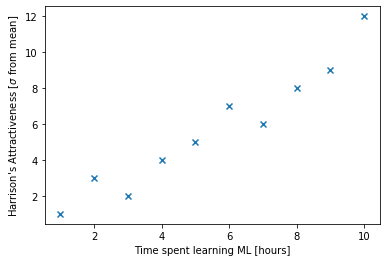

In [25]:
plt.scatter(x,y, marker='x')
plt.xlabel("Time spent learning ML [hours]")
plt.ylabel("Harrison's Attractiveness $[\sigma$ from mean]");

We will solve this using **batch gradient descent**

$$\theta_j =\theta_j -\alpha* \frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1) \text{ for } j = 0,1$$

where $$\frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{1}{N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)$$

$$\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{1}{N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)*x^{(i)}$$

In [26]:
def H(x, θ_0, θ_1):
    return θ_0 + x*θ_1

def cost(x,y,θ_0,θ_1):
    sum = 0
    for i in range(len(x)):
        sum += ( H(x[i], θ_0, θ_1) - y[i] )**2
    return 1/(2*len(x)) * sum
    

def gradient_descent(x, y, α, tol, verbose=True):
    assert len(x) == len(y)
    N = len(x) 
    
    θ_0, θ_1 = random(), random()
    
    while cost(x,y,θ_0,θ_1) > tol:
        if verbose: print("Cost: ",cost(x,y,θ_0,θ_1))
        temp0, temp1 = 0,0
        for i in range(N):
            temp0 += H(x[i], θ_0, θ_1) - y[i]
            temp1 += (H(x[i], θ_0, θ_1) - y[i])*x[i]

        θ_0 = θ_0 - α*temp0/N
        θ_1 =  θ_1 - α*temp1/N



    return θ_0, θ_1

In [27]:
θ_0, θ_1 = gradient_descent(x,y,.01,0.5)

Cost:  5.506718065690229
Cost:  2.3381520657082477
Cost:  1.1699468437623672
Cost:  0.7390163918280747
Cost:  0.5798249288054531
Cost:  0.5207898647388944


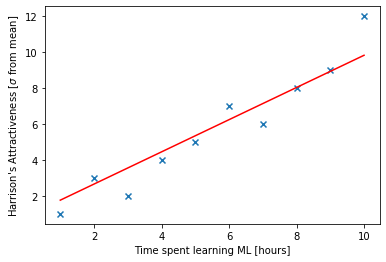

In [28]:
plt.scatter(x,y, marker='x')
plt.plot(x, θ_0+ x*θ_1, color="red")
plt.xlabel("Time spent learning ML [hours]")
plt.ylabel("Harrison's Attractiveness $[\sigma$ from mean]");

# Multivariate Linear Regression
$x^{(i)}_j\equiv$ value of feature j in $i^{th}$ training example 

Our hypothesis now takes the form: $h_{\theta} = \theta_0 + \Sigma ^N _{i = 1} x_i \theta_i$

For convience of notation, we can let $x_0 = 1$

such that: $h_{\theta} = \vec{\Theta}^T\vec{X}$

J is then: J$(\vec{\Theta})$ = $\frac{1}{2N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2$

and finally our algorithm:
$\theta_j := \theta_j -\alpha \frac{\partial}{\partial \theta_j}J(\vec{\Theta})$

$\theta_j := \theta_j -\alpha \frac{1}{N} \Sigma ^N _{i=1} \left( h_{\theta} (x^{(i)}) - y^{(i)} \right)x^{(i)}_j$ simultaneously update $\theta_j$ for all j

In [29]:
def H(x, θ): 
    return np.dot(x,θ)

def cost(X, z, θ):
    sum = 0
    for i in range(len(X[1])):
        sum += ( H(X[:,i], θ) - z[i] )**2
    return 1/(2*len(X[1])) * sum
    

def multi_gradient_descent(X, z, α,tol, verbose=True):
    '''X is an [i,j] matrix where i is the number of training 
    variables and j is the number of points.
    z is the solution
    α is the learning rate, proportional to the size of steps
    tol is the tolerance of the solution accepted, evaulated 
    by the cost()'''
    
    assert len(X[0]) == len(z)
    
    X = np.vstack( (np.ones(len(X[1])), X) ) #add row of x_0's = 1
    N, N_p = X.shape #Number of θ, Number of points

    θ = rand(N)
    
    while cost(X, z, θ) > tol:
        
        if verbose: print("Cost: ",cost(X, z, θ))
        temp = np.zeros(N)
        for j in range(N):
            for i in range(N_p):
                temp += (H(X[:,i], θ) - z[i])*X[j,i]

        θ = θ - α*temp/N

    return θ

Cost:  1.3169397981185538
Cost:  1.3017644739445264
Cost:  1.286767690342719
Cost:  1.2719473467493754
Cost:  1.257301367314272
Cost:  1.2428277006099586
Cost:  1.2285243193444177
Cost:  1.2143892200771096
Cost:  1.2004204229383495
Cost:  1.1866159713519984
Cost:  1.1729739317614065
Cost:  1.1594923933585854
Cost:  1.1461694678165664
Cost:  1.1330032890249044
Cost:  1.1199920128283
Cost:  1.1071338167682925
Cost:  1.0944268998279865
Cost:  1.0818694821797983
Cost:  1.0694598049361501
Cost:  1.0571961299031123
Cost:  1.0450767393369367
Cost:  1.0330999357034563
Cost:  1.0212640414403165
Cost:  1.009567398722003
Cost:  0.9980083692276311
Cost:  0.9865853339114768
Cost:  0.9752966927761944
Cost:  0.9641408646487092
Cost:  0.953116286958752
Cost:  0.942221415519987
Cost:  0.9314547243137246
Cost:  0.9208147052751754
Cost:  0.9102998680822183
Cost:  0.8999087399466552
Cost:  0.8896398654079211
Cost:  0.8794918061292214
Cost:  0.8694631406960674
Cost:  0.8595524644171804
Cost:  0.84975838912

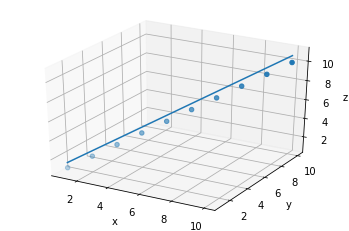

In [34]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,3,4,5,6,7,8,9,10]
z = [1,2,3,4,5,6,7,8,9,10]

X = np.array([x,y])
θ = multi_gradient_descent(X, z, .00001, 0.2, verbose=True)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z)
ax.plot(x,y, θ[0] + np.array(x)*θ[1] + np.array(y)*θ[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z  ');

In [31]:
#hahahahahha
x = [1,2,3]
type(np.array(np.array(x))) == type(np.array(x))

True